# Capstone Project of Applied Data Science (Week 5): 
# The Battle of Neighbourhoods

## Table of contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data Sources](#data)
* [3. Methodology](#methodology)
 * [3.1 Get the address of Jimmy's current house](#3_1)
 * [3.2 Find the latitude and longitude of Jimmy's current house](#3_2)
 * [3.3 Find nearby venues](#3_3)
 * [3.4 Get the list of neighborhoods in central Austin from Wikipedia](#3_4)
 * [3.5 Find the latitude and longitude of neighborhoods in central Austin](#3_5)
 * [3.6 Calculate the distance from his future employer company to the neighborhoods in central Austin](#3_6)
 * [3.7 Find nearby venues for each neighborhood](#3_7)
 * [3.8 Combine the venues in his current neighborhood and the venues in each neighborhood in Austin](#3_8)
 * [3.9 Run K-Means to get 5 clusters](#3_9)
 * [3.10 Find the neighborhood closest to the new company from the neighborhoods with similar amenities](#3_10)
 * [3.11 Visualize the results in a map](#3_11)
* [4. Results](#results)
* [5. Discussion](#discussion)
* [6. Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>

My friend Jimmy is living in a neighborhood in The Woodland, Texas. He likes the living environment of the neighborhood, mainly because of all the great amenities, such as beautiful parks, theatres, schools and so on. 

He recently accepted a job offer from a company in Austin, Texas. Therefore, he will move to Austin soon. He would like to find a neighborhood there similar to his current neighborhood in The Woodland, and asked me for help. After discussing with Jimmy, I understand that he prefers a neighborhood having the same types of amenities as his current neighborhood, and that he hopes the new house is as near to his new company as possible.

![The Woodland, TX](https://res.cloudinary.com/sagacity/image/upload/c_crop,h_680,w_1020,x_0,y_0/c_limit,dpr_auto,f_auto,fl_lossy,q_80,w_1200/East_Market_Streetcomp_rxhstm.jpg)

## 2. Data Sources <a name="data"></a>
To help my friend Jimmy find the neighborhood per his requirement, I will need the following data (data source):

| # | Data | Data Source |
| --- | --- | --- |
| 1 | Address of his current house | Jimmy|
| 2 | Latitude and longitude of his current house | Foursquare API|
| 3 | The borough and neighborhood of his current house | Foursquare API|
| 4 | Amenities in his current neighborhood, and types of these amenities | Foursquare API|
| 5 | Address of his new company | Jimmy|
| 6 | Latitude and longitude of his new company | Foursquare API|
| 7 | Boroughs near his new company | Foursquare API|
| 8 | Neighborhoods in Austin | Wikipedia|
| 9 | Amenities in the neighborhoods in the nearby broughs, and types of these amenities | Foursquare API|


## 3. Methodology<a name="methodology"></a>

### 3.1. Get the address of Jimmy's current house<a name="3_1"></a>

In [500]:
current_address = 'Twin Feather Place, The Woodlands, TX 77381'

### 3.2 Find the latitude and longitude of Jimmy's current house<a name="3_2"></a>

In [501]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import geocoder

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [502]:
def get_latlng(address):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis(address)
        lat_lng_coords = g.latlng
    return lat_lng_coords
    
current_latlng = get_latlng(current_address)

### 3.3 Find nearby venues<a name="3_3"></a>

In [503]:
CLIENT_ID = 'C0XRAK52PJOJDZ002XEDSDULREZ50A2ZT0LORSV2EM1KY42F' # your Foursquare ID
CLIENT_SECRET = 'I2GPEGN0DHU5T0L3EYI4RCFPEHZZM1HJKP34BL5OF5R1JQ4X' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # Number of results to return.
radius = 1000 # limit results to venues within this many meters of the specified location. 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C0XRAK52PJOJDZ002XEDSDULREZ50A2ZT0LORSV2EM1KY42F
CLIENT_SECRET:I2GPEGN0DHU5T0L3EYI4RCFPEHZZM1HJKP34BL5OF5R1JQ4X


In [504]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [505]:
wl_venues = getNearbyVenues(names='Current House',
                                   latitudes=[current_latlng[0]],
                                   longitudes=[current_latlng[1]]
                                  )

C


In [506]:
wl_venues['Neighbourhood'].replace('C', 'The Woodland', inplace=True)
wl_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Woodland,30.183138,-95.528275,Spec's,30.181768,-95.534134,Liquor Store
1,The Woodland,30.183138,-95.528275,Kroger,30.182594,-95.535422,Supermarket
2,The Woodland,30.183138,-95.528275,Perry's Steakhouse & Grill,30.182799,-95.536864,Steakhouse
3,The Woodland,30.183138,-95.528275,Brother's Pizza - Sterling Ridge,30.182555,-95.534615,Pizza Place
4,The Woodland,30.183138,-95.528275,Via Emilia Italian Restaurant in the Woodlands,30.177910,-95.534873,Italian Restaurant


### 3.4 Get the list of neighborhoods in central Austin from Wikipedia<a name="3_4"></a>

We find the list of neighborhoods in central Austin from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods)

In [507]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

res = requests.get("https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
df = pd.DataFrame(df[0])


In [508]:
df1 = df.drop('COA ID#[nb 1]', axis = 1)
df1.columns = ['Neighborhood']
df1

,Neighborhood
0,Bryker Woods
1,Caswell Heights
2,Downtown Austin
3,Eastwoods
4,Hancock
5,Heritage
6,Hyde Park
7,Judges' Hill
8,Lower Waller Creek
9,North University


### 3.5 Find the latitude and longitude of neighborhoods in central Austin<a name="3_5"></a>

In [509]:
latAll = []
lngAll = []
for m in range(df1.shape[0]):
    neighborhood = df1.loc[m][0]
    latlng = get_latlng(neighborhood + ', Austin, TX')
    lat = latlng[0]
    lng = latlng[1]
    latAll.append(lat)
    lngAll.append(lng)

df1['Latitude'] =  latAll
df1['Longitude'] = lngAll

In [510]:
df1

,Neighborhood,Latitude,Longitude
0,Bryker Woods,30.305016,-97.754204
1,Caswell Heights,30.307883,-97.719403
2,Downtown Austin,30.271220,-97.754180
3,Eastwoods,30.290490,-97.731670
4,Hancock,30.297150,-97.726620
5,Heritage,30.285855,-97.771054
6,Hyde Park,30.308570,-97.728280
7,Judges' Hill,33.109868,-97.393863
8,Lower Waller Creek,30.262305,-97.731471
9,North University,30.297030,-97.735770


In [511]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print(geopy.distance.vincenty(coords_1, coords_2).km)

279.35290160386563


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


### 3.6 Calculate the distance from his future employer company to the neighborhoods in central Austin<a name="3_6"></a>

In [512]:
new_company_address = '11501 Alterra Pkwy, Austin, TX 78758'

new_company_latlng = get_latlng(new_company_address)
print('The latitude and longitude of Jimmy''s new company is', new_company_latlng)

The latitude and longitude of Jimmys new company is [30.400939908390686, -97.71977383980645]


In [513]:
print(geopy.distance.vincenty(current_latlng, new_company_latlng).km)

212.20231789892446


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """Entry point for launching an IPython kernel.


In [514]:
distAll = []
for m in range(df1.shape[0]):
    lat = df1.loc[m][1]
    lng = df1.loc[m][2]    
    dist = geopy.distance.vincenty([lat, lng], new_company_latlng).km
    distAll.append(dist)

df1['Distance to New Company'] =  distAll

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """


In [515]:
df1

,Neighborhood,Latitude,Longitude,Distance to New Company
0,Bryker Woods,30.305016,-97.754204,11.137323
1,Caswell Heights,30.307883,-97.719403,10.316195
2,Downtown Austin,30.271220,-97.754180,14.756178
3,Eastwoods,30.290490,-97.731670,12.297597
4,Hancock,30.297150,-97.726620,11.524790
5,Heritage,30.285855,-97.771054,13.677783
6,Hyde Park,30.308570,-97.728280,10.272588
7,Judges' Hill,33.109868,-97.393863,301.955338
8,Lower Waller Creek,30.262305,-97.731471,15.409860
9,North University,30.297030,-97.735770,11.621498


### 3.7 Find nearby venues for each neighborhood<a name="3_7"></a>

In [516]:
df2 = df1
Austin_venues = getNearbyVenues(names=df2['Neighborhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                  )

Bryker Woods
Caswell Heights
Downtown Austin
Eastwoods
Hancock
Heritage
Hyde Park
Judges' Hill
Lower Waller Creek
North University
Oakmont Heights
Old Enfield
Old Pecan Street
Old West Austin
Original Austin
Original West University
Pemberton Heights
Ridgelea
Ridgetop
Rosedale
Shoal Crest
West Downtown


In [517]:
Austin_venues.shape

(1263, 7)

### 3.8 Combine the venues in his current neighborhood and the venues in each neighborhood in Austin<a name="3_8"></a>

In [518]:
All_venues = pd.concat([Austin_venues, wl_venues])
All_venues.shape

(1290, 7)

In [519]:
# one hot encoding
all_onehot = pd.get_dummies(All_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Neighbourhood'] = All_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

all_grouped = all_onehot.groupby('Neighbourhood').mean().reset_index()

In [520]:
all_grouped

,Neighbourhood,Adult Boutique,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bryker Woods,0.000000,0.075472,0.000000,0.00,0.000000,0.000000,0.000000,0.018868,0.000000,...,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Caswell Heights,0.000000,0.010526,0.000000,0.00,0.010526,0.010526,0.000000,0.000000,0.000000,...,0.000000,0.010526,0.010526,0.010526,0.000000,0.000000,0.00,0.010526,0.000000,0.000000
2,Downtown Austin,0.000000,0.050000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.01,0.000000,0.010000,0.040000
3,Eastwoods,0.000000,0.023810,0.011905,0.00,0.000000,0.000000,0.000000,0.011905,0.000000,...,0.000000,0.000000,0.011905,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Hancock,0.014286,0.028571,0.014286,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014286,0.014286,0.000000,0.000000,0.000000,0.00,0.014286,0.000000,0.000000
5,Heritage,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.038462,0.000000,0.038462,0.000000,0.00,0.000000,0.000000,0.000000
6,Hyde Park,0.000000,0.017544,0.000000,0.00,0.035088,0.017544,0.035088,0.017544,0.000000,...,0.000000,0.000000,0.017544,0.000000,0.000000,0.017544,0.00,0.000000,0.000000,0.017544
7,Lower Waller Creek,0.000000,0.030000,0.000000,0.01,0.000000,0.000000,0.000000,0.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.020000
8,North University,0.000000,0.000000,0.011111,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011111,0.011111,0.000000,0.000000,0.00,0.000000,0.000000,0.011111
9,Oakmont Heights,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


### 3.9 Run K-Means to get k-clusters<a name="3_9"></a>

In [521]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
    
#neighborhood_set = set(all_grouped['Neighborhood'].tolist())
#idx_set = []
#for m in range(24):
#    if not all_data['Neighborhood'][m] in neighborhood_set:
#        idx_set.append(m)
        
#ny_data1 = ny_data.drop(ny_data.index[idx_set])

# set number of clusters
kclusters = 6

all_grouped_clustering = all_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 0, 3, 3, 3, 0, 0, 3])

In [522]:
kmeans.labels_

array([0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 4, 1, 3, 5, 0, 0, 0, 2, 0, 0, 0, 0])

In [523]:
all_merged = all_grouped

# add clustering labels
all_merged['Cluster Labels'] = kmeans.labels_

fixed_columns = [all_merged.columns[-1]] + list(all_merged.columns[:-1])
all_merged = all_merged[fixed_columns]

all_merged

,Cluster Labels,Neighbourhood,Adult Boutique,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,Bryker Woods,0.000000,0.075472,0.000000,0.00,0.000000,0.000000,0.000000,0.018868,...,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,0,Caswell Heights,0.000000,0.010526,0.000000,0.00,0.010526,0.010526,0.000000,0.000000,...,0.000000,0.010526,0.010526,0.010526,0.000000,0.000000,0.00,0.010526,0.000000,0.000000
2,3,Downtown Austin,0.000000,0.050000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.01,0.000000,0.010000,0.040000
3,0,Eastwoods,0.000000,0.023810,0.011905,0.00,0.000000,0.000000,0.000000,0.011905,...,0.000000,0.000000,0.011905,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,3,Hancock,0.014286,0.028571,0.014286,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014286,0.014286,0.000000,0.000000,0.000000,0.00,0.014286,0.000000,0.000000
5,3,Heritage,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.038462,0.000000,0.038462,0.000000,0.00,0.000000,0.000000,0.000000
6,3,Hyde Park,0.000000,0.017544,0.000000,0.00,0.035088,0.017544,0.035088,0.017544,...,0.000000,0.000000,0.017544,0.000000,0.000000,0.017544,0.00,0.000000,0.000000,0.017544
7,0,Lower Waller Creek,0.000000,0.030000,0.000000,0.01,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.020000
8,0,North University,0.000000,0.000000,0.011111,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011111,0.011111,0.000000,0.000000,0.00,0.000000,0.000000,0.011111
9,3,Oakmont Heights,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


In [524]:
idx = all_merged[all_merged['Neighbourhood'] == 'The Woodland' ].reset_index().loc[0,'Cluster Labels']
#idx.loc[0,'Cluster Labels']
idx
#idx.iloc[20,'Cluster Labels']
#all_merged
#idx1 = idx.loc[0][ 'Cluster Labels']
#idx1

0

In [525]:
idx = all_merged[all_merged['Neighbourhood'] == 'The Woodland' ].reset_index().loc[0,'Cluster Labels']
df4 = all_merged[all_merged['Cluster Labels'] == idx]
df5 = df4[df4['Neighbourhood']!='C'].reset_index()
df5

,index,Cluster Labels,Neighbourhood,Adult Boutique,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,Bryker Woods,0.0,0.075472,0.000000,0.00,0.000000,0.000000,0.0,...,0.018868,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000
1,1,0,Caswell Heights,0.0,0.010526,0.000000,0.00,0.010526,0.010526,0.0,...,0.000000,0.010526,0.010526,0.010526,0.0,0.00,0.0,0.010526,0.0,0.000000
2,3,0,Eastwoods,0.0,0.023810,0.011905,0.00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.011905,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000
3,7,0,Lower Waller Creek,0.0,0.030000,0.000000,0.01,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.020000
4,8,0,North University,0.0,0.000000,0.011111,0.00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.011111,0.011111,0.0,0.00,0.0,0.000000,0.0,0.011111
5,14,0,Original West University,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.010000,0.000000,0.0,0.00,0.0,0.010000,0.0,0.000000
6,15,0,Pemberton Heights,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.041667,0.0,0.000000
7,16,0,Ridgelea,0.0,0.057692,0.000000,0.00,0.000000,0.000000,0.0,...,0.019231,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000
8,18,0,Rosedale,0.0,0.024096,0.000000,0.00,0.000000,0.000000,0.0,...,0.012048,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000
9,19,0,Shoal Crest,0.0,0.012658,0.000000,0.00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.012658,0.000000,0.0,0.00,0.0,0.000000,0.0,0.025316


### 3.10 Find the neighborhood closest to the new company from the neighborhoods with similar amenities<a name="3_10"></a>

In [526]:
neighbourhood_set = set(df5['Neighbourhood'].tolist())
idx_set = []
for m in range(df2.shape[0]):
    if not df2['Neighborhood'][m] in neighbourhood_set:
        idx_set.append(m)
        
df6 = df2.drop(df2.index[idx_set]).reset_index()
df6

,index,Neighborhood,Latitude,Longitude,Distance to New Company
0,0,Bryker Woods,30.305016,-97.754204,11.137323
1,1,Caswell Heights,30.307883,-97.719403,10.316195
2,3,Eastwoods,30.290490,-97.731670,12.297597
3,8,Lower Waller Creek,30.262305,-97.731471,15.409860
4,9,North University,30.297030,-97.735770,11.621498
5,15,Original West University,30.288140,-97.747280,12.781424
6,16,Pemberton Heights,30.289814,-97.753361,12.735521
7,17,Ridgelea,30.312298,-97.750826,10.270206
8,19,Rosedale,30.312210,-97.747560,10.192746
9,20,Shoal Crest,30.296731,-97.747956,11.865944


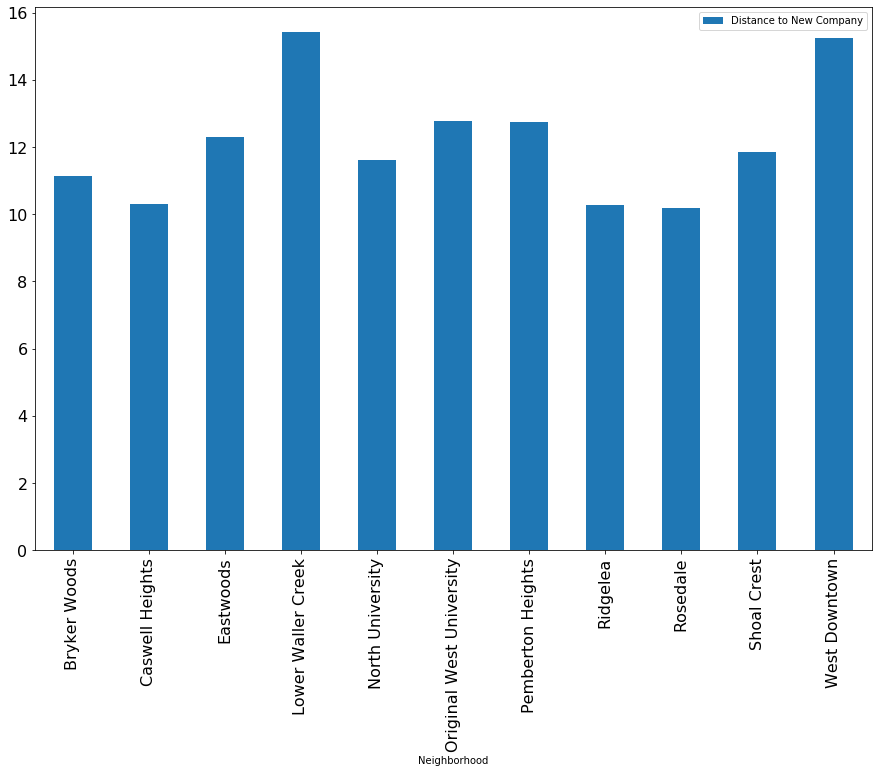

In [540]:
ax = df6.plot.bar(x='Neighborhood', y='Distance to New Company', rot=90, figsize=(15, 10), fontsize=16)

In [533]:
df7 = df6[['Distance to New Company']]
idx = df7.idxmin() 

#idx1 = idx.to_frame()
#idx1[0]
print('The best neighborhood as per Jimmy''s requirement is ', df6.loc[idx[0], 'Neighborhood'], '.')

The best neighborhood as per Jimmys requirement is  Rosedale .


### 3.11 Visualize the results in a map<a name="3_11"></a>
We plot all the neighborhoods (**blue dots**) with similar amenities as well his new company (**red dot**) in a map of Austin, where we can easily see that **Rosedale** is indeed closest to the company.

In [530]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

address = 'Austin'

geolocator = Nominatim(user_agent="Austin_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df6['Latitude'], df6['Longitude'], df6['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
folium.CircleMarker(
        [new_company_latlng[0], new_company_latlng[1]],
        radius=5,
        popup='New Company',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork) 


map_newyork

## 4. Results<a name="results"></a>

According to Jimmy's requirements: (1) similar amenities as his current neighborhood; (2) as close to his new company as possible, we find that the best neighborhood is **"Rosedale"**. 

To test the result's dependence on the number of clusters and initial choice of centroids, we changed the number of clusters from 4 to 6, and running the code multiple times, **Rosedale** turns out to be the result most of the time.

## 5. Discussion<a name="discussion"></a>

In this study, we find the ideal neighborhood based on two criterias: amenities and distance. To find the optimal neighborhood, we qualify all the neighborhoods in Austin in two rounds. In the first round of qualification, we filtered out the neighborhoods whose amenities are dissimilar to his current neighborhood; in the second round of qualification, we picked the one closest to his company from all the remaining neighborhoods.

Our customer (in this case, my friend Jimmy) may have more complicated requirement for the neighborhood, for example, low crime rate, good kindergarten, major race of residents, and so on. In that case, our workflow (multiple runs of qualification) still applies, however, we need different types of data source than the Foursquare API.


## 6. Conclusion<a name="conclusion"></a>
I suggest my friend Jimmy to find a house in Rosedale, Austin, where he can find similar amenities as his current neighborhood, and he will not waste a lot of time in transportation to company. I am happy that what I learnt from the course can be applied in real life.

![Rosedall, Austin, TX](https://odis.homeaway.com/odis/destination/8468cce9-a90c-4c63-a86b-455dbf825947.hw5.jpg)
